# Hierarchical GANs for morphological and geometric trees

## Imports

In [1]:
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers.core import Dense, Reshape, Dropout, Activation
from keras.layers import Input, merge
from keras.models import Model
from keras.layers.wrappers import TimeDistributed
from keras.layers.recurrent import LSTM

# Other
import matplotlib.pyplot as plt
from copy import deepcopy
import os
import pickle

%matplotlib inline

# Local
import McNeuron
import models
import train
import batch_utils
import data_transforms

Using Theano backend.


## Example neuron

/Users/pavanramkumar/anaconda2/lib/python2.7/site-packages/scipy/sparse/compressed.py:730: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  SparseEfficiencyWarning)


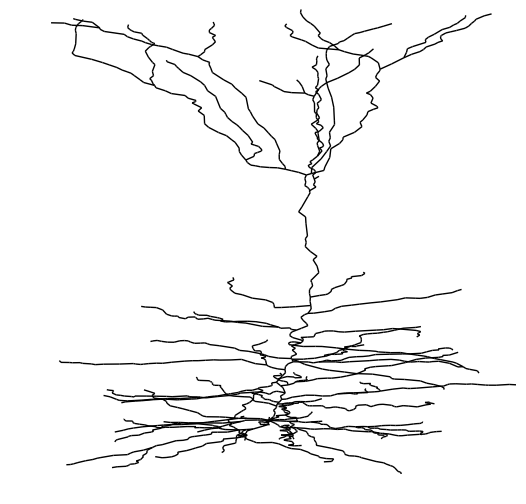

In [2]:
neuron_list = McNeuron.visualize.get_all_path(os.getcwd()+"/Data/Pyramidal/chen")
neuron = McNeuron.Neuron(file_format = 'swc', input_file=neuron_list[50])
McNeuron.visualize.plot_2D(neuron)

## Training

### Global parameters

In [36]:
n_levels = 1
n_nodes = [20]

input_dim = 100

n_epochs = 2
batch_size = 64
#n_batch_per_epoch = 133
n_batch_per_epoch = 25
d_iters = 20
#lr =  0.00005
lr =  0.0005

weight_constraint = [-0.01, 0.01]

### Load Data

In [58]:
training_data = pickle.load(open("/Users/pavanramkumar/Dropbox/HG-GAN/03-Data/train2.p", "rb"))

In [45]:
print training_data['morphology']['n20'].shape
print training_data['geometry']['n20'].shape

(8535, 18)
(8535, 19, 3)


### Run

In [39]:
geom_model, morph_model, disc_model, gan_model = \
    train.train_model(training_data=training_data,
                      n_levels=n_levels,
                      n_nodes=n_nodes,
                      input_dim=input_dim,
                      n_epochs=n_epochs,
                      batch_size=batch_size,
                      n_batch_per_epoch=n_batch_per_epoch,
                      d_iters=d_iters,
                      lr=lr,
                      weight_constraint=weight_constraint)


Level #0

    Epoch #0

    After 20 iterations
        Discriminator Loss                         = -0.0381126180291

    Generator_Loss: 0.0496642887592
    After 20 iterations
        Discriminator Loss                         = -0.0428265444934

    Generator_Loss: 0.049861650914
    After 20 iterations
        Discriminator Loss                         = -0.0428893454373

    Generator_Loss: 0.0495487675071
    After 20 iterations
        Discriminator Loss                         = -0.0427277311683

    Generator_Loss: 0.0493252910674
    After 20 iterations
        Discriminator Loss                         = -0.0428767427802

    Generator_Loss: 0.0495607405901
    After 20 iterations
        Discriminator Loss                         = -0.0427449829876

    Generator_Loss: 0.0489258766174
    After 20 iterations
        Discriminator Loss                         = -0.0425583682954

    Generator_Loss: 0.0490231364965
    After 20 iterations
        Discriminator Loss         

In [40]:
locations_tmp = geom_model[0].predict(np.random.randn(1,1,100))

In [41]:
softmax_tmp = np.squeeze(morph_model[0].predict(np.random.randn(1,1,100)))
prufer_tmp = softmax_tmp.argmax(axis=1)
print prufer_tmp

[ 0  8  8  8 18  0  0  0  0  0  4  4  0 15  4  4  4  0]


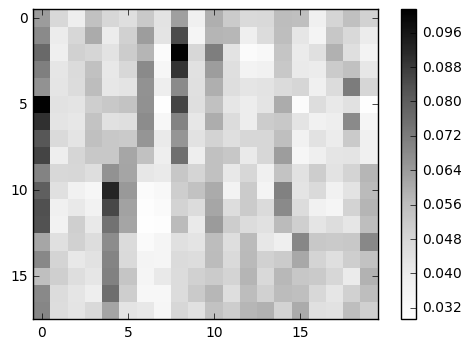

In [42]:
plt.imshow(softmax_tmp, interpolation='none', cmap='Greys')
plt.colorbar()
plt.show()

In [43]:
np.array(data_transforms.decode_prufer(list(prufer_tmp))).shape

(20,)

In [44]:
input_code = dict()
input_code['morphology'] = np.array(prufer_tmp)
input_code['geometry'] = np.squeeze(locations_tmp)
neuron_object = data_transforms.make_swc_from_prufer_and_locations(input_code)

IndexError: list index out of range

In [51]:
input_code = dict()
input_code['morphology'] = training_data['morphology']['n20'][1, :]
input_code['geometry'] = np.squeeze(training_data['geometry']['n20'][1, :, :])
neuron_object = data_transforms.make_swc_from_prufer_and_locations(input_code)

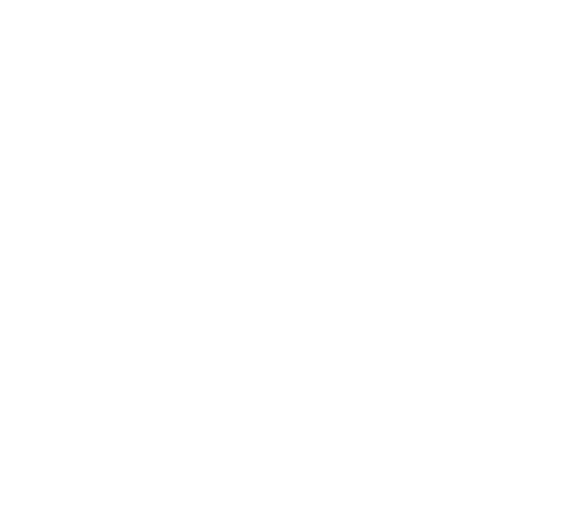

In [52]:
McNeuron.visualize.plot_2D(neuron_object)

In [69]:
training_data['geometry']['n20'][20, :]

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])